# Model Evaluation

## Assessing Model Performance

# Overview
* Classification and regression
* Evaluation metrics used for each
* Intrinsic vs extrinsic evaluation

You will already be familiar with supervised learning and the two main tasks those algorithms are used for: classification and regression. In the classification setting, we want to predict a discrete label (or labels) for a given input. In regression, the prediction will be a real-valued number.

This learning unit will cover how we assess the performance of models created to solve these two tasks. First, an overview of how the two tasks differ in the output their models produce. Then, we take inventory of the many metrics used to measure how good that output is, relative to our expectations. Finally, we contrast this intrinsic approach to one grounded in more pragmatic, extrinsic, considerations.

## Classification vs regression

* Classification - categorical dependent/response variable
* Regression - numerical dependent/response variable

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns

# Load iris dataset 
iris = load_iris()
# print(iris.data.shape)
# print(iris.target_names)

# convert it to a dataframe and use only a subset
df_iris = pd.DataFrame(iris.data)
df_iris.columns = iris.feature_names
df_iris['class'] = iris.target

subset_iris = df_iris.iloc[:, [0,1,4]]
subset_iris = subset_iris.loc[subset_iris["class"]<=1,:]

In [ ]:
plt.figure(figsize=(12,10))
plt.title("Example classification problem",  size = "xx-large")
plt.text(5.95, 3.95, "o", c ="red", size = "x-large")
plt.text(6, 4, "?", c ="red", size = "xx-large")
sns.scatterplot(x=subset_iris.columns[0], y=subset_iris.columns[1], data=subset_iris, hue="class");

As an example of a classification problem - we have a dataset about 3 different types of irises and 4 measurements. For simplicity we look at a subset of the data with 2 iris types and 2 measurements - sepal width and sepal length. Let 0 denote the 'Setosa' iris type and 1 the 'Versicolor' iris type, we can visualise our data as shown in the figure. 

Say we have this point here, marked in red with a question mark, an observation with sepal length 6 and sepal width 4, what type of iris is it? Setosa or Versicolor?

In classification, we attempt to map features of objects to some categorical group label. In our example, the categories are Setosa or Versicolor. When we have a new (or unlabeled) observation, we want to predict whether it is Setosa or Versicolor.


The key evaluation question for classification is "How good are the labels assigned by the model?" We need to be able to quantitatively compare models which make different classifications for the same data points.

## Classification vs regression

* Classification - categorical dependent/response variable
* Regression - numerical dependent/response variable

In [ ]:
import numpy as np

setosa_iris = subset_iris.loc[subset_iris["class"]<=0,:]

# fit polynomial of degree 1
xp = np.linspace(4, 6, 100)
z1 = np.polyfit(setosa_iris.iloc[:, 0], setosa_iris.iloc[:, 1], 1)
p1 = np.poly1d(z1)

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Example Regression problem",  size = "xx-large")
plt.text(5.55, 3.65, "o", c ="red", size = "x-large")
plt.text(5.6, 3, "?", c ="red", size = "xx-large")
plt.vlines(x=5.57, ymin=2, ymax=3.65, colors='red', ls=':', lw=2)
sns.scatterplot(x=setosa_iris.columns[0], y=setosa_iris.columns[1], data=setosa_iris, hue="class")
plt.plot(xp, p1(xp), '-', c="green");
# plt.plot(x, y, 'o', xp, p1(xp), '-')

In regression, we attempt to predict one real-valued number using one or more other real-valued numbers. 

In the graph here, we only look at the measurements of Setosa iris. The aim is to learn the relationship between Setosa's sepal width and length. Given a new datapoint which tells us the sepal length in cm, our model should output a prediction for its sepal width in cm. 

The key evaluation question for regression is "How close are the predictions to the observed values?" We need to be able to quantitatively compare models which produce different $y$ values for the same $x$ value.

## Requirements for evaluation

* A trained model's output: *target predictions*
    * Supervised training will require labeled data
* A data set you can evaluate those predictions against: the *ground truth*
    * Ideally data the model has never seen before
* Some metric that compares predictions to the ground truth

Before we go further, let's clarify exactly what resources we need to perform evaluation.

First, a trained model you can use to generate predictions. This will have been trained on some dataset that maps inputs to outputs.

Second, some data that the model has not seen before when being trained. This allows us to say something about the generalisability of the model: how well it adapts to novel inputs. This is because in most cases we don't have access to datasets which contain all possible inputs and their outputs. If we did, it would probably be a trivial task such as adding two numbers between 0 and 100. 

In practice, we usually gather as much data as we can and then set aside a portion of it for evaluation. Here, however, we will just use toy examples.

## Classification evaluation: accuracy

* May have 2 possible classes (binary) or 3+ (multiclass)
* Data points can belong to only *one* class
* Key measure: how many labels are predicted *accurately*? $\text{accuracy} = \frac{\# \text{correct}}{\# \text{data}}$ 

In [ ]:
from sklearn.linear_model import LogisticRegression
X = subset_iris.iloc[:, 0:1]
y = subset_iris.iloc[:, 2]
clf = LogisticRegression(random_state=0).fit(X, y)

In [ ]:
y_pred = clf.predict(X) # get predicted y
 
print("Accuracy: ", (y==y_pred).mean())

Using our subset iris dataset with 100 observations, 2 measurements - sepal width and sepal width, and 2 classes - Setosa or Versicolor; we fit a logistic regression (without splitting into training and testing). 

The basic measure calculated here is accuracy: the number of correct predictions, as a proportion of the total number of predictions made.

Accuracy is generally reported as a percentage, so here it is 89%.

This form of accuracy is also referred to as micro accuracy. It doesn't take the individual classes into account, only the overall number of correct predictions.

### Micro and macro accuracy for imbalanced classes

* What if classes are *imbalanced*?<br>
Compute macro accuracy over classes $C$ : $$\text{accuracy}_{\text{macro}} = \frac{1}{\vert C \vert}\sum_{i=1}^{C} \text{accuracy}_{i}$$

In [ ]:
# Per-class, micro and macro accuracy
truth =  np.array(['A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B'])
preds =  np.array(['A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'])

a_acc = (truth[truth=='A'] == preds[truth=='A']).mean()
b_acc = (truth[truth=='B'] == preds[truth=='B']).mean()

In [ ]:
print(f"Class A accuracy: {a_acc}\n")
print(f"Class B accuracy: {b_acc}\n")

print(f"Micro accuracy: {(truth==preds).mean()}\n")
print(f"Macro accuracy: {1/(len(set(y))) * (a_acc + b_acc):.2f}\n")

Here we can see a more detailed breakdown of how the predictions aligned with the expected values.

Using any one accuracy number alone doesn't really give the fullest picture of how close the predictions are to the ground truth.

Per-class accuracy tells us that the model is very good at predicting one class. Micro and macro accuracy tell us that while overall performance may seem high, this obscures a big difference in per-class performance.

### True positive and false positive rate

For the binary classification example:

* Accuracy is only concerned with correct predictions. Calculated using only:
    * *True positives* (TP) : Class A predicted as Class A
    * *True negatives* (FP) : Class B predicted as Class B
* Rate regarding incorrect predictions:
    * *False negatives* (FN) : Class A predicted as Class B
    * *False positives* (FP) : Class B predicted as Class A

Using a few versions of accuracy can tell us a lot about how good a model is at being correct, but we may find it useful to know something about how wrong a model is.

In the binary classification example we've been looking at (where the output of the model can only be one of either A or B), we can label each of the model's predictions in terms of it matching the ground truth or not. This is done for each class, relative to the other class, as shown in the table.

Additional information:

Calculating these values for a simple binary classifier is straightforward, but becomes a bit complex if you have many classes. Luckily, there are packages in Python which will do this all for us!

The multiclass case, where there are 3 or more classes (but inputs can still only have one class label predicted) is an extension of the binary case. 

If you have three classes (A, B, C) and want to calculate TP, FN, FP and TN then you need to do this by considering each class in turn, and the model predictions for each class relative to the other classes.

For example, if a class A is correctly labeled as A, then that counts as a TP for A. It is also a TN for both B and C.

But if A is classed as B, that is a FN for A. It is also a FP for B but still a TN for C.

Conversely, if A is classed as C, it is still a FN for A. But now it is a TN for B and a FP for C.

### Precision and recall (recap from *L04 Model validation*)

- The other commonly used criteria for binary classification are **precision** and **recall**:

\begin{align*}
\text{recall} &= TPR = \frac{TP}{TP+FN} \\
\text{precision} &= \frac{TP}{TP + FP}.
\end{align*}


- **Recall** is the same as true positive rate or sensitivity. **Precision** describes how good the model is at predicting the positive class.

- A recall of 1.0 for A means all items which should have been classified as A were indeed classified as A. None were classified as B.

- A precision of 1.0 for A means that the model never labeled a B as an A: all the items predicted as A were correct.

### F1 score (recap from *L04 Model validation*)

* Combines precision and recall to generate one simple number and penalise extreme values:
    * F1 Score = $2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}$
* Can be weighted more in favour of precision or recall:
    * $F_{\beta}$ Score = $(1 + \beta^2) \cdot \frac{\text{precision} \cdot \text{recall}}{(\beta^2 \cdot \text{precision}) + \text{recall}}$
    * Favours recall when $\beta \gt 1$ and precision when $\beta \lt 1$

Sometimes you just want a single number to sum everything up. The harmonic mean of precision and recall provides this.

As with precision and recall, it ranges from 0 to 1.0 and should not be reported as a percentage.

When precision and recall are 1.0, the F1 will also be 1.0.

The standard F1 score will always be somewhere between the precision and recall used to calculate it.

In the standard F1 score, precision and recall contribute equally. Depending on your use case, you might want to place more importance on precision or recall.

This can be done through the beta parameter. When equal to 1, precision and recall are treated equally. When greater than one, the F1 score takes recall more into account. And when less than 1 precision counts for more of the final score.

### Classification evaluation: all classes

* Accuracy, precision, recall, F1 are calculated per class: focused evaluation
* Averages over the per-class scores: big picture evaluation
* Class averages can be weighted to take class importance into account
    * Can prioritise rare classes or ignore them somewhat
    * Might result in an F1 that is not between precision and recall
* Use these to evaluate the classification predictions of any model
* ```sklearn.metrics``` implements all of these and more

The classification metrics we've looked at so far are best used to understand how well a model does in general and for each of the classes in your dataset.

The ideal model will perform well on all classes but, in practice, this is unlikely. Zooming in to see per-class performance is therefore useful: perhaps more training examples are needed or additional feature engineering is necessary. Or perhaps the poorly predicted classes aren't actually that important, given your goals, so they can be discounted!

## Classification evaluation

In [ ]:
# Example of all of the above in one sklearn command...
# If you need only raw numbers, then use sklearn.metrics.precision_recall_fscore_support
# or sklearn.metrics.accuracy_score

from sklearn.metrics import classification_report, precision_recall_fscore_support

truth =  ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
preds =  ['B', 'B', 'B', 'A', 'B', 'A', 'A', 'B', 'B', 'B', 'A', 'B', 'A', 'B', 'B', 'B']


In [ ]:
print(classification_report(truth, preds))

print(precision_recall_fscore_support(truth, preds))

Calculating the per-class metrics is straightforward: just pass in an array of the ground truths and an array of your model's predictions. These should be the same length and the prediction at position $i$ should correspond to the ground truth at position $i$.

`classification_report` generates a report with all the key information.

Support is the number of examples of that class in the ground truth data, while macro and weighted averages of each metric were discussed earlier.

The report tells you the three metric scores (P/R/F1) but also gives different versions of these (micro/macro/weighted).

Macro average: compute metric (P/R/F1) for each class and divide by number of classes. Treats each class the same.

Micro/weighted average: use the actual numbers of TP/FP/FN/TN and divide by the total number of examples. Each class's contribution to the final score is proportional to how often it appears in the data.

### ROC curves
- Receiver Operator Characteristic (ROC) curves plot False Positives against True Positive for binary classifier

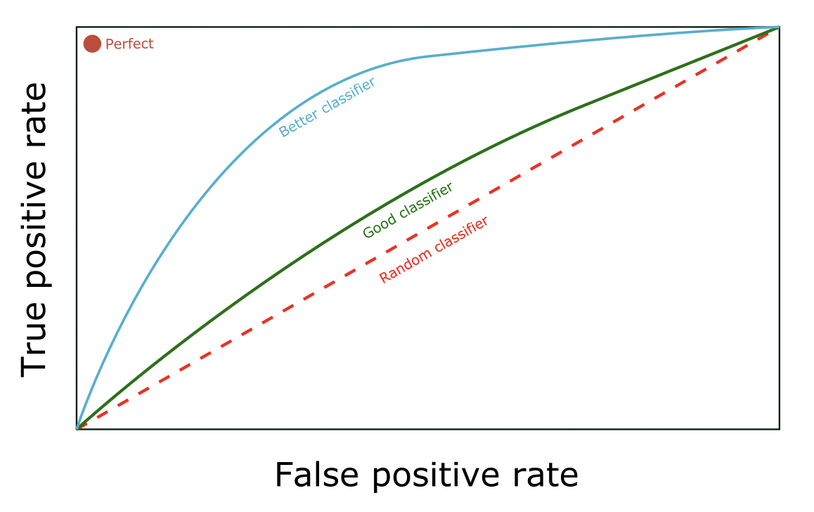

- If false positive rate == true positive rate then you are essentially randomly guessing
- The perfect classifier has a high true positive rate and a low false positive rate

ROC curves are something you will see come up often to detect how good a binary classifier is. 

We plot the false positive rate against the true positive rate to give us the "reciever operator characteristic". 

If the false positive rate is equal to the true positive rate then we are doing the equivalent of randomly guessing - this is represented by the dotted red line through the middle.

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y, y_pred)
fpr, tpr, thresholds = roc_curve(y, y_pred)

### ROC curves


In [ ]:
# ROC curve for the subset iris dataset
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

This is the ROC curve using the subset iris dataset we discussed before. We have 100 observations, 2 classes and 2 predictors. In most cases you want to see a ROC curve that hugs the top-left corner. This case looks a bit piecewise because as we saw in our visualisation before, the classes are visibly separable. 

### Working with log probabilities

* In modeling joint likelihood for a set of iid datapoints, the product becomes sum, $\log(\prod_{i=1}^n p(x_i))=\sum_{i=1}^n \log(p(x_i))$.
* Since $\log x$ is a monotonically increasing function, it does not change the sign of the function. Maximizing $f(x)$ is the equivalent to maximizing $\log(f(x))$.
* Numerical advantage - the product of a large number of small probabilities can easily underflow the numerical precision of the computer, computing the sum of the log probabilities resolves this.

### Classification evaluation: using probabilities

* Accuracy, precision, recall and F1 all focus on discrete classification outcomes
* Many classifiers output not only a class prediction, but the probability associated with that prediction
    * A measure of the model's confidence in the evidence in support of the prediction
    * A model which is correct AND confident would be nice to have
* For binary classification:
    * **Brier Score**: $\frac{1}{n}\sum_{i=1}^{n} (p_t - a_t)^2 $

So far we have looked at evaluating the final predictions of a classification model. But many algorithms provide a probability score alongside each prediction.

We can evaluate the confidence of a binary classification model by comparing the probabilities associated with each prediction.

For the positive or true class, a perfect score would be 1. For the negative or false class, it would be 0.

The Brier Score simply subtracts each actual score from its predicted score, sums them all up and divides by the number of predictions to get an average.

It is a loss function, so a lower score is better.

### Classification evaluation: using probabilities

In [ ]:
model_1_preds = ['B', 'B', 'A', 'A', 'A']
model_1_probs = [0.9, 0.8, 0.65, 0.35, 0.3]

model_2_preds = ['B', 'B', 'A', 'A', 'A']
model_2_probs = [0.7, 0.7, 0.55, 0.1, 0.2]

from sklearn.metrics import brier_score_loss

print(f"Model 1 loss: {brier_score_loss(model_1_preds, model_1_probs, pos_label='B'):.2f}")
print(f"Model 2 loss: {brier_score_loss(model_2_preds, model_2_probs, pos_label='B'):.2f}")

Here, both models make the same predictions but with different probabilities. The Brier Score for Model 2 is better.

### Classification evaluation: using probabilities

* Log loss: similar to Brier Score, evaluating model probabilities
    * But can be used for binary and multiclass classification
* Each prediction $y \in Y$ has a probability estimate $p$ per class $k \in K$
* Class labels become numerical: $[0, 1, 2, \cdots, n]$
* Want to penalise probability predictions the more they lead to the wrong prediction
* Log loss multiplies the class labels by the log probability for each prediction, and takes the average
$$ L_{\log}(Y, P) = - \frac{1}{N} \sum_{i=0}^{N-1} \sum_{k=0}^{K-1} y_{i,k} \log p_{i,k} $$

Brier Score only works for binary classification. For models with more than two classes, log loss does something similar.

Rather than compare the model's probability score for each prediction to a perfect score, log loss takes the log of each probability per class per prediction, multiplies it by the class label (e.g. False = 0, True = 1), adds all these together and takes the average over the number of predictions. (This is always a negative number so it is multiplied by -1 to make it positive and more readily considered as a loss.)

### Classification evaluation: log loss


In [ ]:
from sklearn.metrics import log_loss

model_1_preds = ['B', 'B', 'A', 'A', 'A']
model_1_probs = [[0.9, 0.1], [0.8, 0.2], [0.65, 0.35], [0.4, 0.6], [0.3, 0.7]]

model_2_preds = ['B', 'B', 'A', 'A', 'A']
model_2_probs = [[0, 1.0], [0, 1.0], [1.0, 0], [1.0, 0], [1.0, 0]]

model_3_preds = ['B', 'B', 'A', 'A', 'A']
model_3_probs = [[1.0, 0], [1.0, 0], [0, 1.0], [0, 1.0], [0, 1.0], ]

print(f"Model 1 loss: {log_loss(model_1_preds, model_1_probs):.2f}")
print(f"Model 2 loss: {log_loss(model_2_preds, model_2_probs):.2f}")
print(f"Model 3 loss: {log_loss(model_3_preds, model_3_probs):.2f}")

Of course, this is all implemented in `sklearn`!

The only difference is that the probabilities for each prediction must contain an entry for every possible class, and sum to 1.

Models trained in `sklearn` will output these for you through the `predict_proba()` method.

You can see here that the perfect model 2 has a loss of 0, while the completely wrong model has a much higher loss. 
In theory, there is no upper limit to loss, but the lowest loss is 0. 

The completely wrong model, given by model 3 gets 34.54 because of an eps parameter.

> 'Log loss is undefined for $p=0$ or $p=1$, so probabilities are clipped to `max(eps, min(1 - eps, p))`.'

and so this value comes from [that](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html).

### Classification evaluation: visualisation

* Confusion matrix: a quick visual representation of classification outcomes
* Lets you see how class predictions are distributed over all classes
* $n \times n$ grid with model predictions on one axis, ground truth on the other
* A perfect classifier will only have values on the diagonal


In [ ]:
import random
from sklearn.metrics import confusion_matrix

ground_truth = random.choices(['cat', 'dog', 'mouse'], weights=[2,2,1], k=100)
predictions  = random.choices(['cat', 'dog', 'mouse'], weights=[2,2,1], k=100)

print(confusion_matrix(ground_truth, predictions))

Sometimes a quick visual inspection of a classifier's output is useful.

A confusion matrix shows how the ground truth aligns with the predictions. A perfect match will only have values on the diagonal.

### Classification evaluation: confusion matrix


In [ ]:
import seaborn as sns

sns.heatmap(confusion_matrix(ground_truth, predictions), cmap='Blues', square=True, annot=True, xticklabels=['cat','dog','mouse'], yticklabels=['cat','dog','mouse']);


Visualising the confusion matrix as a heatmap can be an easy way to see if a model consistently mixes up two particular classes - if it always gets one class right, if it never gets one class right, and so on.

There are lots of configuration options for presenting confusion matrices, such as displaying raw values, normalising by row/col/total, colour choices, what range of colours to use, and so on.

## Decision boundaries 

- Neat way to visualise what your classifier might do for new points and check if you have overfit
- Iterate over the $(x, y)$ points and see what your model assigns

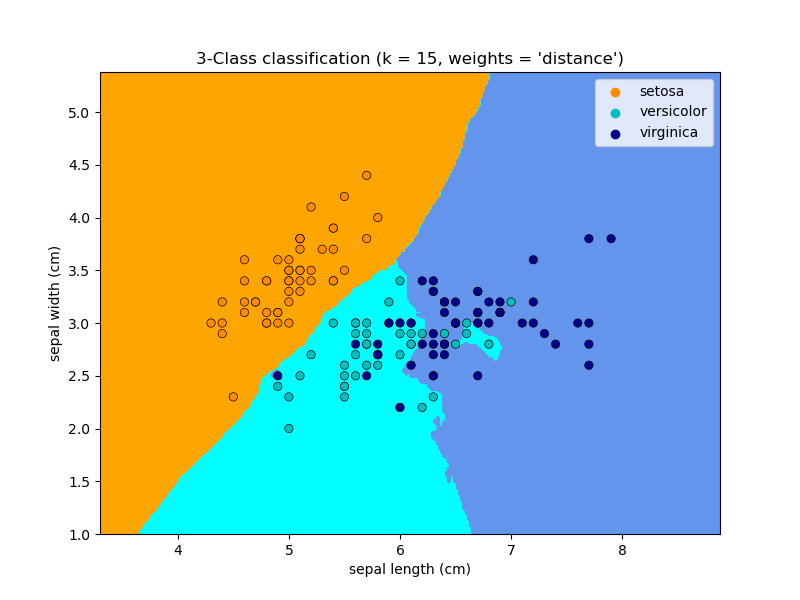

One very intuitive way to evaluate what your classification model is doing is to draw out the decision boundaries between pairs of variables. 

The x and y axes in this picture are two input features, and the data is coloured by class. You can see that this model in particular seems reasonably sensible. There is one light blue region in the middle of the dark blue region which might be overfitting but otherwise the decision boundaries look visually sensible.

If we are lucky to have few dimensions, this is a handy way to check in on models. 

### Summary: classifiers

* Classifier evaluation focus = "How good are the labels assigned by the model?"
* Measure performance with metrics such as accuracy, precision, recall, F1
    * But be aware of the class balance in the data!
* Evaluate confidence of probabilistic classifier models with Brier score (binary) or log loss (binary or multiclass)
* Visualise classifier outcomes vs ground truth using a confusion matrix

## Regression evaluation: error

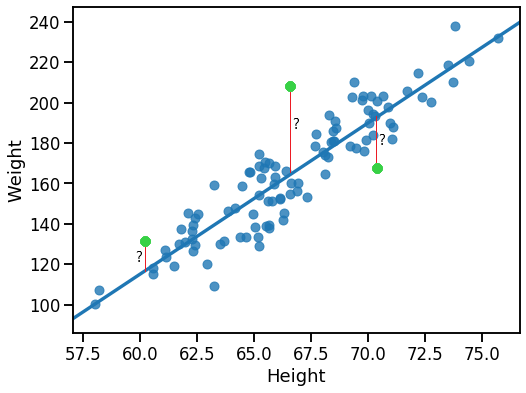

Regression evaluation: quantify $\lvert y - \hat{y} \rvert$

Evaluating regression models is a little more straightforward, as there is no concept of true/false positives/negatives and no classes to consider.

The main task is determining how far each prediction's value is from the expected value. These differences may be processed in some way and then averaged, to give a single number quantifying how good a fit the model is.

As with classification, we will need a trained model which can generate a prediction $y$ for some input $x$.

## Regression evaluation: error

For $n$ model predictions $\hat{y} \in \hat{Y}$ and ground truth $y \in Y$ :

* Mean Absolute Error: $\frac{1}{n} \sum_{i=0}^{n - 1} \left| y_i - \hat{y}_i \right|$
    * How close are predictions and truth, regardless of sign?
    * Small and large errors penalised the same

* Median Absolute Error: $\text{median}(\mid y_1 - \hat{y}_1 \mid, \ldots, \mid y_n - \hat{y}_n \mid)$
    * Calculate all individual absolute errors, then select the median value
    * Robust to outliers

MAE is the most basic error value to calculate: the average difference between predictions and ground truth.

It penalises all errors to the same extent.

## Regression evaluation: error

For $n$ model predictions $\hat{y} \in \hat{Y}$ and ground truth $y \in Y$ :

* Mean Squared Error: $\frac{1}{n} \sum_{i=0}^{n - 1} (y_i - \hat{y}_i)^2$
    * Sensitive to larger errors more than small ones, due to squaring

* Root Mean Squared Error: $\sqrt{\frac{1}{n} \sum_{i=0}^{n - 1} (y_i - \hat{y}_i)^2}$
    * Scales MSE back to match units for $y$ - interpretable
    
* Mean Squared Logarithmic Error: $\frac{1}{n} \sum_{i=0}^{n - 1} (\log (1 + y_i) - \log (1 + \hat{y}_i) )^2$
    * Similar to MSE but take the log of the prediction and ground truth
    * Greatly penalises under-prediction compared to over-prediction 

## Regression evaluation: error

In [ ]:
# Some imaginary weights in kilograms
true_weights = [20, 30, 25, 44, 47]
pred_weights = [22, 31, 20, 29, 44]

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(true_weights, pred_weights)

print(f"MSE: {mse}")
print(f"RMSE: {pow(mse, 0.5):.2f}")

MSE and RMSE are sensitive to predictions which are further away from the truth.

For prediction/truth of $(3,5)$ and $(3,6)$ MSE will be 4 and 9: a difference of 5.

Compare this to MAE which would be 2 and 3: a difference of only 1.

RMSE will make the units of the error score match those of the original variable.

## Regression evaluation: scoring

* $R^2$ score: evaluate the linear relation between model predictions $\hat{y} \in \hat{Y}$ and ground truth $y \in Y$ 
    * MSE normalised by average deviation from the ground-truth mean 
    * Equal to 1.0 for a perfect relationship
    * Always predicting the mean of all ground-truth values would score 0
    * Can be less than 0 if the fit is worse than a horizontal line!
    
* Equal to $1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$
    * Numerator is the MSE
    * $\bar{y}$ is the mean of the ground truth values

$R^2$ is useful for quantifying the linear relationship between predictions and true values.

It's a normalised form of MSE, considering how far each prediction is from the mean of the ground truth values.

This is like asking - "If a model always predicted the mean of the ground truth, I would give it a score of 0. How does my model compare to that situation?"

If the score is less than 0, it means that the model performs worse than a horizontal line.

## Regression evaluation: scoring

In [ ]:
# Ground truth is just numbers 0 to 50, twice
true_y = [i for i in range(50)] * 2
# Predictions are just ground truth with a bit of noise
pred_y = [random.gauss(mu=1, sigma=10) + i  for i in true_y]

from sklearn.metrics import r2_score

r2 = r2_score(true_y, pred_y)

print(f"R2: {r2}")

## Regression evaluation: scoring


In [ ]:
sns.regplot(x=true_y, y=pred_y);

R-squared is implemented in `sklearn`. Here, some random data is generated and the R-squared calculated.

`Seaborn` also has a nice regression plotting function (`regplot`), which will fit a simple regression to the data.

Try playing with how much noise is added to the ground truth and see how that affects R2.

## Explained variance

- Explained variance is highly related to R2
- If we say that $SSR$ = sum of squared residuals, then
$$
R^2 = 1 - \frac{\frac{\text{SSR}}{n}}{\text{Variance}_y}
$$

$$
\text{Explained variance} = 1 - \frac{\frac{\text{SSR}- \text{mean error}}{n}}{{\text{Variance}_y}}
$$

- If these are equal, the mean error is 0 - this indicates we have an *unbiased* model

Explained variance is highly related, but slightly different, to the R2 score - the only difference is that we take into account the mean error of our predictions.

If the mean of the errors is non-zero it suggests that our predictor is skewed in some direction and might be biased. If the mean of the errors is zero then the R2 and explained variance are equal.

## Explained variation 
- How much of your data is captured by your model?

In [ ]:
import numpy as np
np.random.seed(1)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score
from sklearn.datasets import make_regression, make_circles

fig, axs = plt.subplots(1,3, figsize=(15,5))

model = LinearRegression()

X, y = make_regression(n_features=1, n_samples=100, noise=10)
X = np.hstack((np.ones(X.shape), X))
model.fit(X, y)
sns.regplot(x=X[:,1], y=y, ax=axs[0])
explained_variance = explained_variance_score(y, model.predict(X))
axs[0].set_title(f"Explained var: {str(explained_variance)[:4]} \n R2: {str(r2_score(y, model.predict(X)))[:4]}")


X, y = make_circles(n_samples=100)
model.fit(X,y)
explained_variance = explained_variance_score(y, model.predict(X))
axs[1].set_title(f"Explained var: {explained_variance}\n R2: {str(r2_score(y, model.predict(X)))[:4]}")
sns.regplot(x=X[:,0], y=X[:,1], ax=axs[1]);

X, y = make_regression(n_features=1, n_samples=100, noise=10., bias=40)
X = np.hstack((np.ones(X.shape), X))

axs[2].scatter(X[:,1], y)
axs[2].plot(X[:,1], model.predict(X))
explained_variance = explained_variance_score(y, model.predict(X))
axs[2].set_title(f"Explained var: {str(explained_variance)[:4]}\n R2: {str(r2_score(y, model.predict(X)))[:4]}");

You can picture all of the points on the graphs as being mapped down from two dimensions onto the 1D line that our model defines. 

In the case that this mapping doesn't cause much loss of information, we say that the model **explains** the variance of the data well. 

Look at the left and compare it to the right. In the left, each point is mapped to its closest location on the line. This causes very little information loss between our data and the line itself. 

By contrast, if we mapped the data from the right onto the line, we would lose almost all of the information about the relationship between the x and y axes. 

We can see that fitting a line to the circles is completely the wrong model, and this is reflected in the explained variance score.


Notice also that there is a difference between the R2 and the explained variance scores on the right hand side. This is because the model is now a *biased* model - the errors do not have a mean of zero - whereas on the other two plots, it's clear that the model is not skewed and the datapoints are symmetric around the lines.

## Correlation 
To what extent are the model output and the ground truth related?

In [ ]:
import numpy as np
import seaborn as sns
np.random.seed(1)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score
from sklearn.datasets import make_regression, make_circles

fig, axs = plt.subplots(1,3, figsize=(12,4))

model = LinearRegression()

X, y = make_regression(n_features=1, n_samples=100, noise=10)
X = np.hstack((np.ones(X.shape), X))
model.fit(X, y)
sns.regplot(x=X[:,1], y=y, ax=axs[0])
corrcoef = np.corrcoef(y, model.predict(X))[0,1]
axs[0].set_title(f"Pearson correlation: {str(corrcoef)[:4]} \n R2: {str(r2_score(y, model.predict(X)))[:4]}")


X, y = make_circles(n_samples=100)
model.fit(X,y)
corrcoef = np.corrcoef(y, model.predict(X))[0,1]
axs[1].set_title(f"Pearson correlation: {corrcoef}\n R2: {str(r2_score(y, model.predict(X)))[:4]}")
sns.regplot(x=X[:,0], y=X[:,1], ax=axs[1]);


X, y = make_regression(n_features=1, n_samples=100, noise=10., bias=40)
X = np.hstack((np.ones(X.shape), X))
X[0] = 0.4999

axs[2].scatter(X[:,1], y)
axs[2].plot(X[:,1], model.predict(X))
corrcoef = np.corrcoef(y, model.predict(X))[0,1]

axs[2].set_title(f"Pearson correlation: {str(corrcoef)[:4]}\n R2: {str(r2_score(y, model.predict(X)))[:4]}");

## Correlation

- Model may contain desired information even if it does not accurately predict the data.
- Correlations allow one to retrieve this weaker relationship between the model output and the ground truth.
- Different correlation coefficients can be used for this purpose.
- Rank-based correlations can be applied to ordinal variables - e.g. Spearman correlation coefficient: $$\rho=1-\frac{6\sum d_i^2}{n(n^2-1)}, $$
where $d_{i}$ is the difference between the two ranks of each observation and $n$ is the number of observations.

- Working with correlations as a metric, it is necessary to investigate how the obtained value relates to the no-information model output. 

### Summary: regression

* Regression evaluation focus = "How close to the true values are my model's predictions?"
* Measure performance in terms of error (lower = better): MAE, MSE, RMSE etc.
    * But be aware of how much you want to penalise bad predictions!
* Or in terms of score (higher = better): $R^2$

Also, it's likely that you want to actually use the model for something. Even if you have chosen the best-performing model in terms of F1 or log loss or RMSE, extrinsic evaluation asks - "What did using this model gain for me?"

## Intrinsic vs extrinsic evaluation
* Intrinsic evaluation: evaluate the quality of the model directly
    * Metrics such as accuracy, mean squared error, ...
* Extrinsic evaluation: evaluate the practical impact of the model
    * Examples from business: customer satisfaction, revenues, or conversion rates
    * Other practical examples: throughput, time saved, or effort saved
* How to measure extrinsic impact?
    * Compare the situation before deploying the model and afterwards
    * Controlled experiments (A/B testing)

Some metrics to consider in a business setting might involve measuring customer satisfaction, revenues, or conversion rates. In more practical settings, you might be more interested in throughput, time saved, or effort saved. In order to measure extrinsic impact, you would need an idea of the situation before deploying the model and afterwards.

Or you can use controlled experiments (such as A/B testing) to compare outcomes with and without a model, or to compare multiple models.

Comparing multiple models in practice can be informative because a model which performs best on intrinsic evaluation may well not be the best when evaluated extrinsically!

## Jupyter Exercise

Model Evaluation

Open practical file `evaluation-metrics.ipynb`